<a href="https://colab.research.google.com/github/Yujini68/ESAA/blob/main/%EC%8B%9C%EA%B0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 나눔 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'NanumGothic' #matplotlib  한글 깨짐 방지

#그래픽 출력 결과를 셀 아래 표시
%matplotlib inline

import warnings
warnings.filterwarnings(action = 'ignore')

In [3]:
train=pd.read_csv("/content/movies_train.csv")

In [4]:
train.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


In [5]:
train.tail()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
595,해무,(주)NEW,드라마,2014-08-13,111,청소년 관람불가,심성보,3833.0,1,510,7,1475091
596,파파로티,(주)쇼박스,드라마,2013-03-14,127,15세 관람가,윤종찬,496061.0,1,286,6,1716438
597,살인의 강,(주)마운틴픽쳐스,공포,2010-09-30,99,청소년 관람불가,김대현,NaN,0,123,4,2475
598,악의 연대기,CJ 엔터테인먼트,느와르,2015-05-14,102,15세 관람가,백운학,NaN,0,431,4,2192525
599,베를린,CJ 엔터테인먼트,액션,2013-01-30,120,15세 관람가,류승완,NaN,0,363,5,7166532


In [6]:
print(train.shape)

(600, 12)


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


In [8]:
pd.options.display.float_format = '{:.1f}'.format

In [9]:
train.describe()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
count,600.0,270.0,600.0,600.0,600.0,600.0
mean,100.9,1050442.9,0.9,151.1,3.7,708181.8
std,18.1,1791408.3,1.2,165.7,2.4,1828005.9
min,45.0,1.0,0.0,0.0,0.0,1.0
25%,89.0,20380.0,0.0,17.0,2.0,1297.2
50%,100.0,478423.6,0.0,82.5,3.0,12591.0
75%,114.0,1286568.6,2.0,264.0,4.0,479886.8
max,180.0,17615314.0,5.0,869.0,25.0,14262766.0


# 1. 상영등급 별 관객수

In [10]:
train['screening_rat'].value_counts()

청소년 관람불가    204
15세 관람가     202
12세 관람가     102
전체 관람가       92
Name: screening_rat, dtype: int64

Text(0, 0.5, 'count')

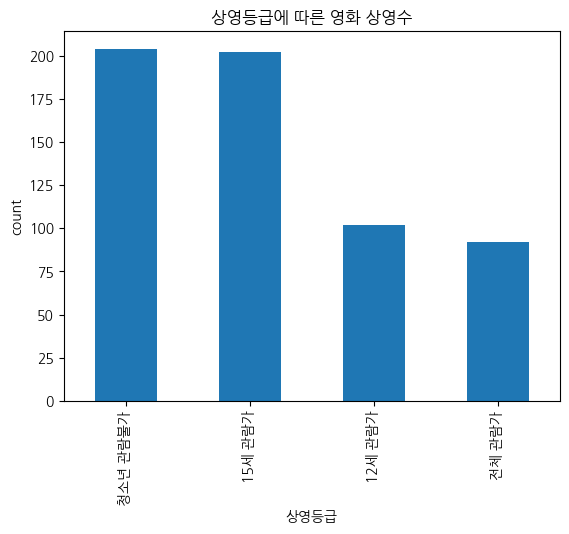

In [11]:
train['screening_rat'].value_counts().plot(kind='bar')
plt.title('상영등급에 따른 영화 상영수')
plt.xlabel('상영등급')
plt.ylabel('count')

관객 수 많은 순: 15세 관람가, 12세 관람가, 청소년 관람불가, 전체 관람가

(0.0, 4000000.0)

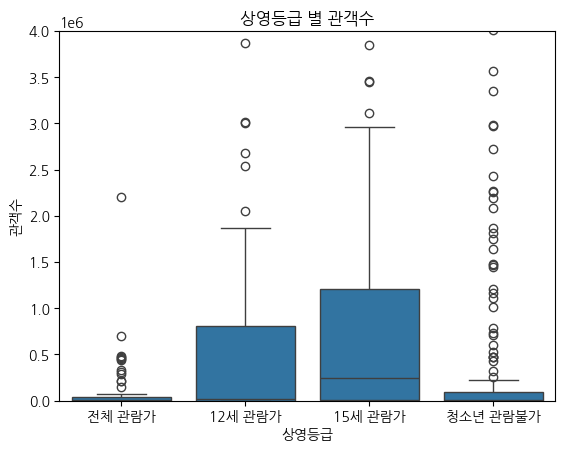

In [12]:
ax=plt.subplots()
ordersr = ['전체 관람가','12세 관람가','15세 관람가','청소년 관람불가']
ax=sns.boxplot(x='screening_rat',y='box_off_num',data=train,order=ordersr)
plt.title("상영등급 별 관객수")
plt.xlabel('상영등급')
plt.ylabel('관객수')
plt.ylim(0,4000000)

# 2. 상영등급 별 장르

Text(0, 0.5, '관객수')

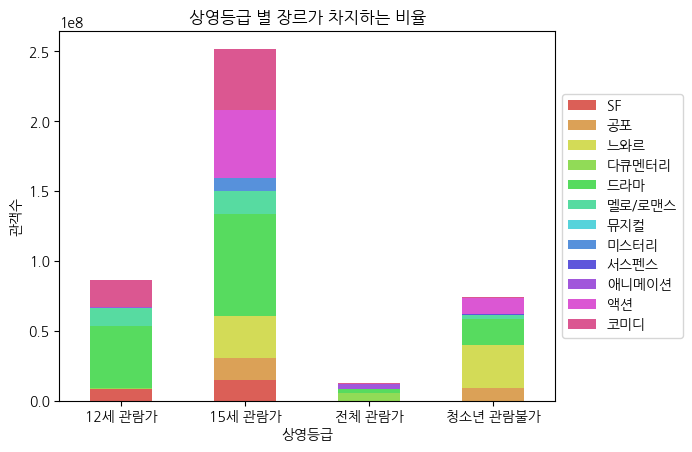

In [13]:
order_g = train['genre'].unique()      #genre 값들의 순서 정하고 색깔 겹치지 않게 지정
order_g = np.sort(order_g)
color_g= sns.color_palette('hls', len(order_g))
a=train.groupby(['screening_rat','genre']).sum()
a=pd.DataFrame(a.reset_index())
a = a.pivot(index='screening_rat', columns='genre', values='box_off_num')
a.plot.bar(stacked=True,color=color_g) #누적 막대그래프
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))  #legend 위치 조정
plt.xticks(rotation=0)
plt.title('상영등급 별 장르가 차지하는 비율')
plt.xlabel('상영등급')
plt.ylabel('관객수')

전체관람가에서는 다큐멘터리와 애니메이션 장르가 인기

12세, 15세 관람가에서는 드라마 장르가 인기

청소년 관람불가에서는 느와르 장르가 인기

# 3. 영화 배급사에 따른 평균 관객 수 TOP 10

In [14]:
# 영화 배급사를 기준으로 평균 관객 수를 정렬한 후 상위 10개 추출
dist1=train.groupby('distributor').mean()[['box_off_num']].sort_values(by='box_off_num', ascending=False).head(10)
dist1

,box_off_num
distributor,
CJ E&M Pictures,4122337.0
(주)쇼박스,3386656.3
(주)아이필름코퍼레이션,3117859.0
쇼박스(주)미디어플렉스,2634823.0
영구아트무비,2541603.0
CJ E&M 영화부문,2505309.3
(주)NEW,2184404.8
CJ 엔터테인먼트,2162742.5
이십세기폭스코리아(주),1637046.0


- CJ가 여러 개로 나누어져 있는 것이 관찰된다. 따라서 배급사 이름 전처리가 필요하다.

In [15]:
# 배급사 이름 전처리 함수
def dist_clean(x):
    if 'CGV' in x:     # 'CGV'가 들어있는 이름은 모두 'CGV'로 바꿈
        return 'CGV'
    elif 'CJ' in x:    # 'CJ'가 들어있는 이름은 모두 'CJ E&M'으로 바꿈
        return 'CJ E&M'
    elif '쇼박스' in x: # '쇼박스'가 들어있는 이름은 모두 '쇼박스'로 바꿈
        return '쇼박스'
    else:
        return x

In [16]:
# 'distributor' 열에 위 함수 적용
train['distributor'] = train['distributor'].apply(dist_clean)
train

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.5,2,387,3,7072501
2,은밀하게 위대하게,쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.2,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.0,2,20,6,217866
4,불량남녀,쇼박스,코미디,2010-11-04,108,15세 관람가,신근호,1.0,1,251,2,483387
...,...,...,...,...,...,...,...,...,...,...,...,...
595,해무,(주)NEW,드라마,2014-08-13,111,청소년 관람불가,심성보,3833.0,1,510,7,1475091
596,파파로티,쇼박스,드라마,2013-03-14,127,15세 관람가,윤종찬,496061.0,1,286,6,1716438
597,살인의 강,(주)마운틴픽쳐스,공포,2010-09-30,99,청소년 관람불가,김대현,NaN,0,123,4,2475
598,악의 연대기,CJ E&M,느와르,2015-05-14,102,15세 관람가,백운학,NaN,0,431,4,2192525


In [17]:
# 전처리된 train 데이터로 다시 영화 배급사별 평균 관객 수 상위 10개 추출
dist1=train.groupby('distributor').mean()[['box_off_num']].sort_values(by='box_off_num', ascending=False).head(10)
dist1

,box_off_num
distributor,
쇼박스,3332953.9
(주)아이필름코퍼레이션,3117859.0
영구아트무비,2541603.0
CJ E&M,2246588.1
(주)NEW,2184404.8
이십세기폭스코리아(주),1637046.0
SK텔레콤(주),1383867.0
롯데엔터테인먼트,1238148.9
전망좋은영화사,1214237.0


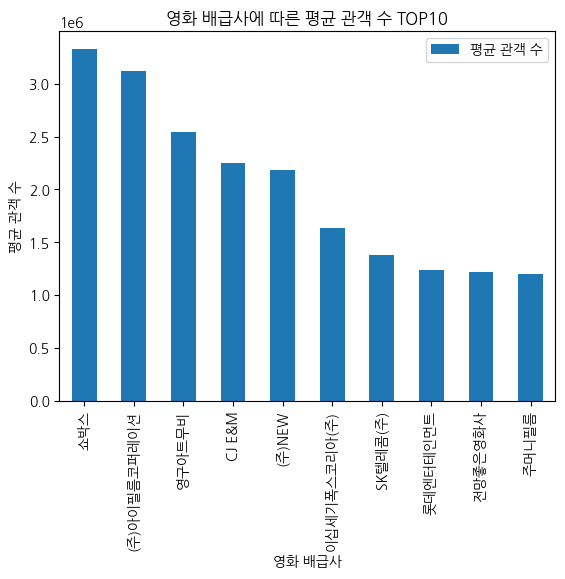

In [18]:
dist1.plot(kind='bar')

plt.title('영화 배급사에 따른 평균 관객 수 TOP10') # 차트 제목
plt.xlabel('영화 배급사')                          # x축 이름
plt.ylabel('평균 관객 수')                         # y축 이름
plt.legend(labels=['평균 관객 수'], loc='best')    # 범례 표시

# 4. 감독의 지난 영화 평균 관객 수와 이번 영화 관객 수의 관계

In [19]:
# 결측치 확인
train.isna().sum()

title               0
distributor         0
genre               0
release_time        0
time                0
screening_rat       0
director            0
dir_prev_bfnum    330
dir_prev_num        0
num_staff           0
num_actor           0
box_off_num         0
dtype: int64

In [20]:
# 결측치 특성 확인
train[train['dir_prev_bfnum'].isna()]
train[train['dir_prev_bfnum'].isna()]['dir_prev_num'].sum()

0

In [21]:
# dir_prev_bfnum이 결측치로 존재하는 데이터들은 모두 dir_prev_num이 0인 영화이다.
# 즉, 감독의 이전 작품이 존재하지 않는다. 따라서 dir_prev_bfnum의 결측치를 모두 0으로 바꾼다.
train['dir_prev_bfnum'].fillna(0, inplace=True)

In [22]:
# 감독의 지난 영화 평균 관객 수 정렬
train.dir_prev_bfnum.sort_values()

0            0.0
350          0.0
349          0.0
348          0.0
347          0.0
         ...    
409    7838528.5
118    7855474.0
16     8223342.0
214    8801639.0
338   17615314.0
Name: dir_prev_bfnum, Length: 600, dtype: float64

- 마지막 행에서 이상치가 관찰된다. 그래프를 그려보고 추후 이상치를 처리한 그래프와 차이가 있는지 살펴본다.

In [23]:
# 감독의 이번 영화 관객 수 정렬
train.box_off_num.sort_values()

432           1
324           2
338           8
410          10
481          36
         ...   
460    12323595
498    12706663
530    12811435
362    12983841
372    14262766
Name: box_off_num, Length: 600, dtype: int64

In [24]:
# 감독의 지난 영화 평균 관객 수 이상치 제거
train_new=train[train.dir_prev_bfnum!=train.dir_prev_bfnum.max()]
train_new.dir_prev_bfnum.sort_values()

0           0.0
350         0.0
349         0.0
348         0.0
347         0.0
         ...   
326   6720926.5
409   7838528.5
118   7855474.0
16    8223342.0
214   8801639.0
Name: dir_prev_bfnum, Length: 599, dtype: float64

In [25]:
import seaborn as sns

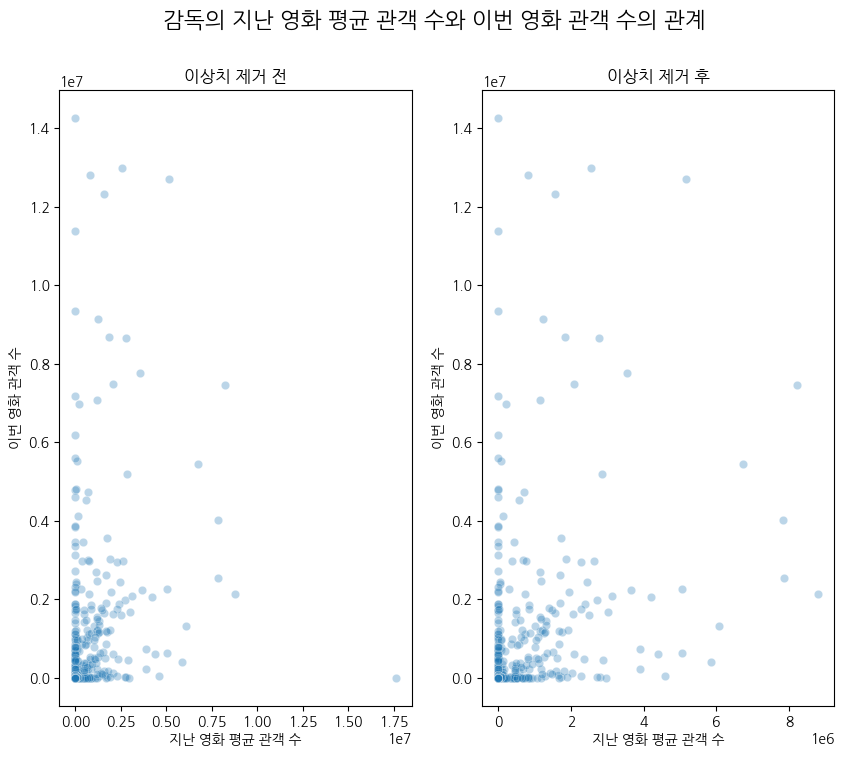

In [26]:
# 그래프 객체 생성(figure에 2개의 서브 플롯 생성)
fig=plt.figure(figsize=(10, 8))
ax1=fig.add_subplot(1, 2, 1)
ax2=fig.add_subplot(1, 2, 2)

# axe 객체에 boxplot 메소드로 그래프 출력
sns.scatterplot(x='dir_prev_bfnum', # x축 변수
            y='box_off_num',        # y축 변수
            data=train,             # 데이터
            ax=ax1, alpha=0.3)      # axe 객체 - 1번째 그래프

sns.scatterplot(x='dir_prev_bfnum', # x축 변수
            y='box_off_num',        # y축 변수
            data=train_new,         # 데이터
            ax=ax2, alpha=0.3)      # axe 객체 - 2번째 그래프

fig.suptitle('감독의 지난 영화 평균 관객 수와 이번 영화 관객 수의 관계', fontsize=16) # figure 제목

ax1.set_title('이상치 제거 전')
ax2.set_title('이상치 제거 후')

ax1.set_xlabel('지난 영화 평균 관객 수')
ax1.set_ylabel('이번 영화 관객 수')

ax2.set_xlabel('지난 영화 평균 관객 수')
ax2.set_ylabel('이번 영화 관객 수')

plt.show()

# 5. 스태프 수와 관객 수 사이의 관계

Text(0.5, 1.0, '전체 변수 간의 상관계수 히트맵')

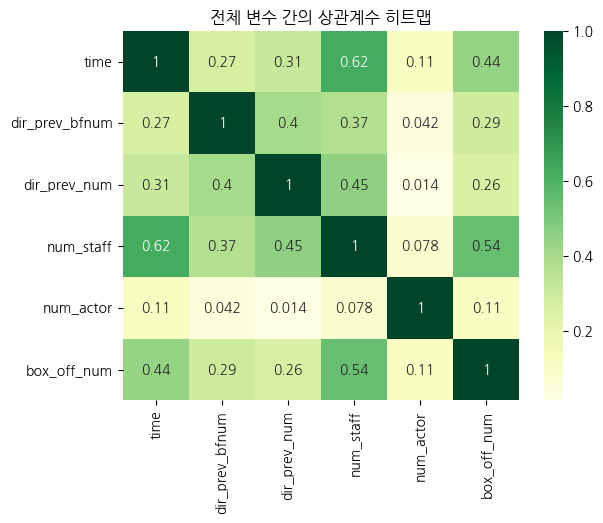

In [27]:
sns.heatmap(train.corr(), annot = True, cmap = 'YlGn')

plt.title('전체 변수 간의 상관계수 히트맵')

Text(0.5, 1.0, '스태프 수와 관객 수 사이의 산점도')

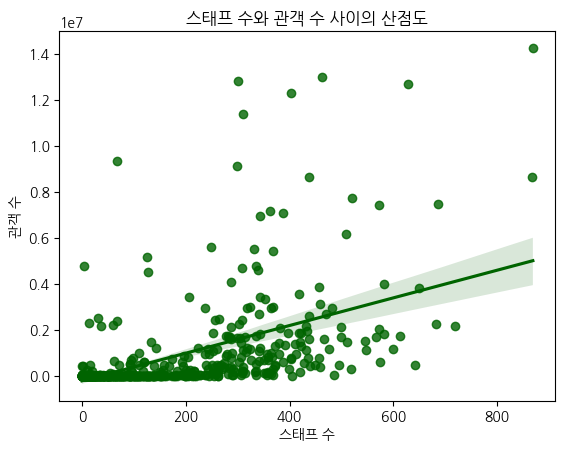

In [28]:
sns.regplot(x = 'num_staff', y = 'box_off_num', data = train, color = 'darkgreen',  fit_reg = True)

plt.xlabel('스태프 수')
plt.ylabel('관객 수')
plt.title('스태프 수와 관객 수 사이의 산점도')

# 6. 장르에 따른 평균 관객 수

Text(0.5, 1.0, '장르에 따른 평균 관객 수')

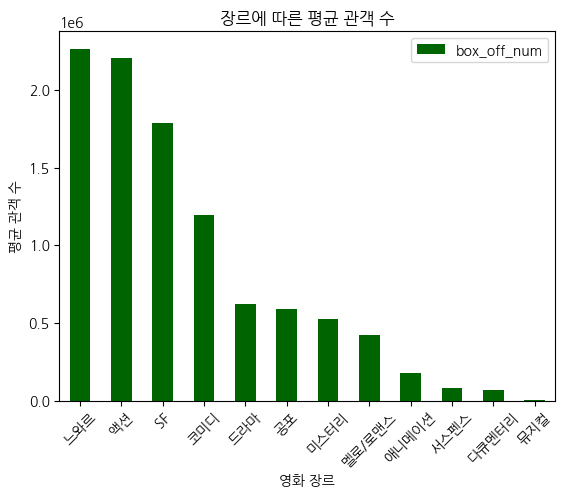

In [29]:
train[['genre','box_off_num']].groupby('genre').mean().sort_values('box_off_num', ascending=False).plot(kind='bar', color = 'darkgreen')
plt.xticks(rotation = 45)
plt.xlabel('영화 장르')
plt.ylabel('평균 관객 수')
plt.title('장르에 따른 평균 관객 수')

# 7. 상영등급에 따른 관객수와 전 작품의 개수

Text(0, 0.5, '관객 수')

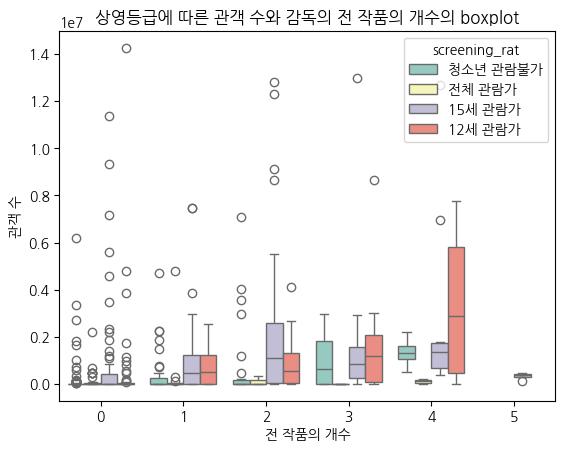

In [30]:
ax=plt.subplots()
ax = sns.boxplot(x='dir_prev_num', y='box_off_num', hue='screening_rat', palette = 'Set3', data=train)
ax.set_title('상영등급에 따른 관객 수와 감독의 전 작품의 개수의 boxplot')
ax.set_xlabel('전 작품의 개수')
ax.set_ylabel('관객 수')

# 8. 상영시간에 따른 상영등급과 관객수

In [31]:
pd.qcut(train['time'],4)
quarter = ['1','2','3','4']
train['time_quarter'] = pd.qcut(train['time'],4, labels = quarter)
train['time'].describe()

count   600.0
mean    100.9
std      18.1
min      45.0
25%      89.0
50%     100.0
75%     114.0
max     180.0
Name: time, dtype: float64

In [32]:
train.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,time_quarter
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,0.0,0,91,2,23398,2
1,내부자들,쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.5,2,387,3,7072501,4
2,은밀하게 위대하게,쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.2,4,343,4,6959083,4
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.0,2,20,6,217866,3
4,불량남녀,쇼박스,코미디,2010-11-04,108,15세 관람가,신근호,1.0,1,251,2,483387,3


Text(0, 0.5, '관객 수')

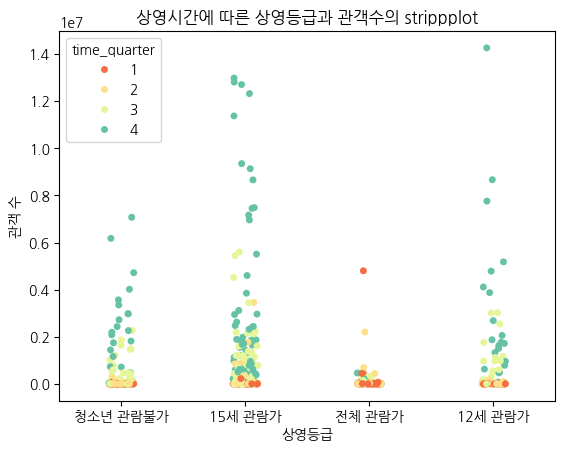

In [33]:
bx=sns.stripplot(x='screening_rat', y='box_off_num', hue='time_quarter',
              palette='Spectral',
              data=train)
bx.set_title('상영시간에 따른 상영등급과 관객수의 strippplot')
bx.set_xlabel('상영등급')
bx.set_ylabel('관객 수')

# 9. 상영시간에 따른 관객수 분포

- 산점도와 히스토그램이 같이 나오는 jointplot 사용

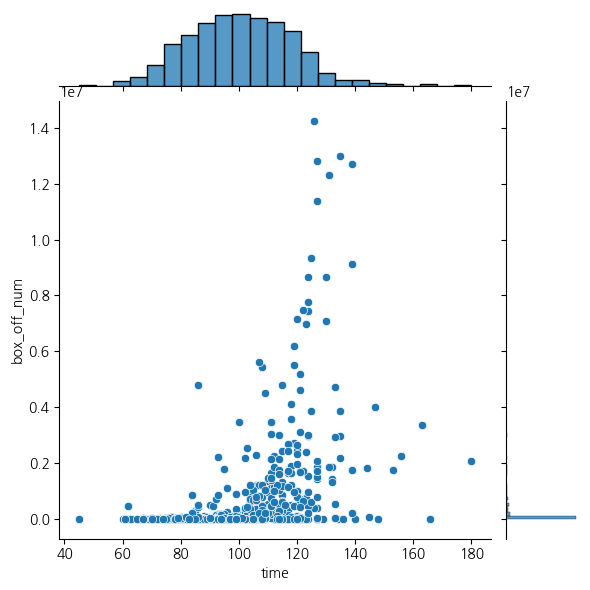

In [34]:
sns.jointplot(x='time',y='box_off_num',data=train)
plt.show()

- regplot을 이용하여 산점도와 회귀선 확인

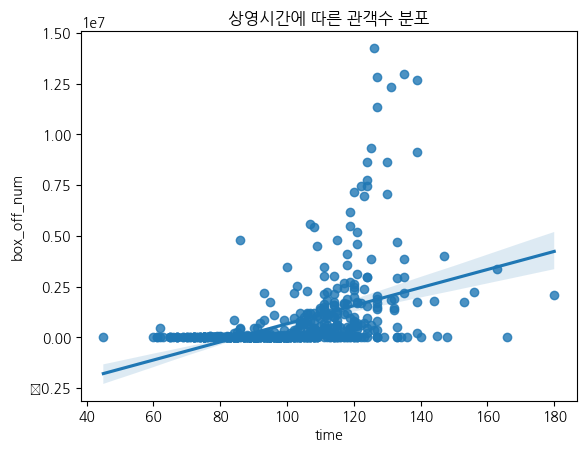

In [35]:
sns.regplot(x='time',y='box_off_num',data=train)
plt.title('상영시간에 따른 관객수 분포')
plt.show()

# 10. 장르에 따른 관객수 분포

- 장르에 따른 관객수 계산

In [36]:
train.groupby('genre')['box_off_num'].sum().sort_values(ascending=False)

genre
드라마       138277444
코미디        63277442
액션         61711274
느와르        61119768
멜로/로맨스     33225507
공포         24814966
SF         23248494
미스터리        8968319
다큐멘터리       6247020
애니메이션       3820460
서스펜스         165222
뮤지컬           33135
Name: box_off_num, dtype: int64

- pie 차트를 이용하여 한눈에 보기

Text(0.5, 1.0, '영화 장르 별 관객 비율')

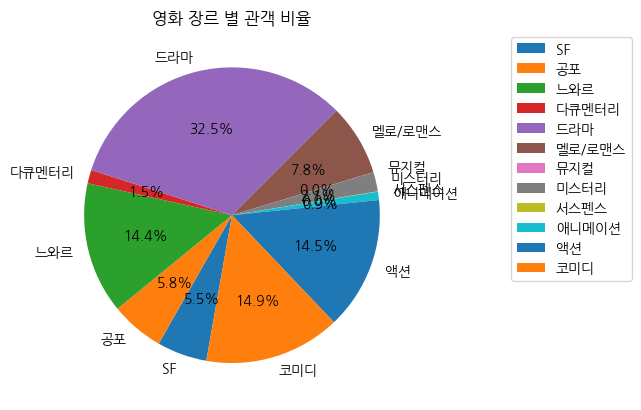

In [37]:
train.groupby(['genre']).sum().plot(kind='pie', y='box_off_num', autopct='%.1f%%', startangle=260, counterclock=False,)
plt.legend(bbox_to_anchor=(1.6,1))
plt.ylabel('')
plt.title('영화 장르 별 관객 비율')